# Mathematical Function Visualizations

This notebook visualizes various mathematical functions including scalar functions, complex-valued functions, vector fields, and parametric curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set better default plot style
plt.style.use('default')
%matplotlib inline

## 1. Scalar Function of Two Variables

$$f: \mathbb{R}^2 \to \mathbb{R}, \quad f(x_1, x_2) = \sqrt{|x_1 x_2|}$$

**Visualization:** Yes, we can visualize this as a 3D surface plot where the height represents the function value.

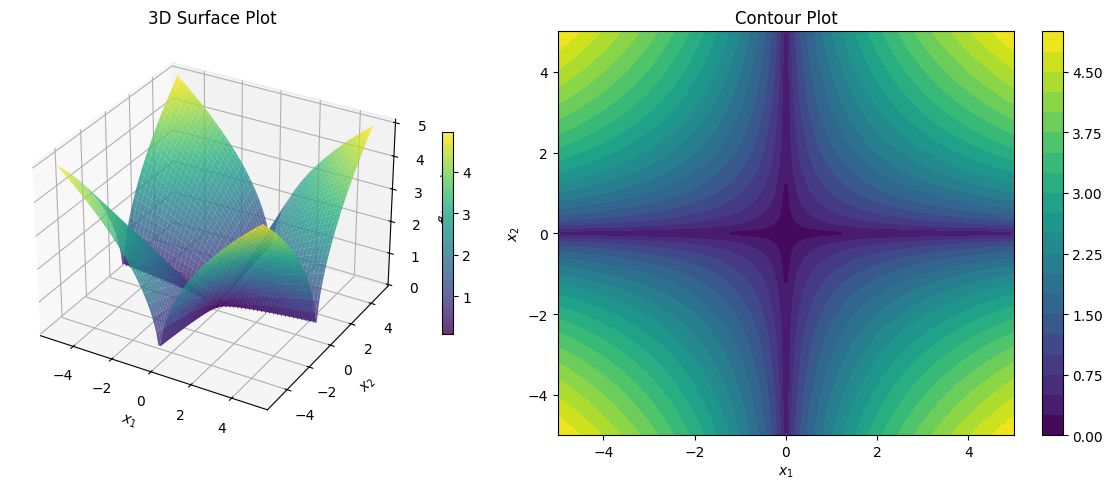

✓ Visualizable: 2D input → 1D output can be shown as a 3D surface


In [2]:
# Create grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate function values
Z = np.sqrt(np.abs(X1 * X2))

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')
ax1.set_title('3D Surface Plot')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=20, cmap=cm.viridis)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Contour Plot')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print("✓ Visualizable: 2D input → 1D output can be shown as a 3D surface")

## 2. Scalar Function of Four Variables

$$f: \mathbb{R}^4 \to \mathbb{R}, \quad f(x_1, x_2, x_3, x_4) = \sqrt{|x_1 x_2 x_3 x_4|}$$

**Visualization:** No direct visualization possible in 3D space. We would need 5 dimensions (4 input + 1 output). However, we can show 2D slices by fixing some variables.

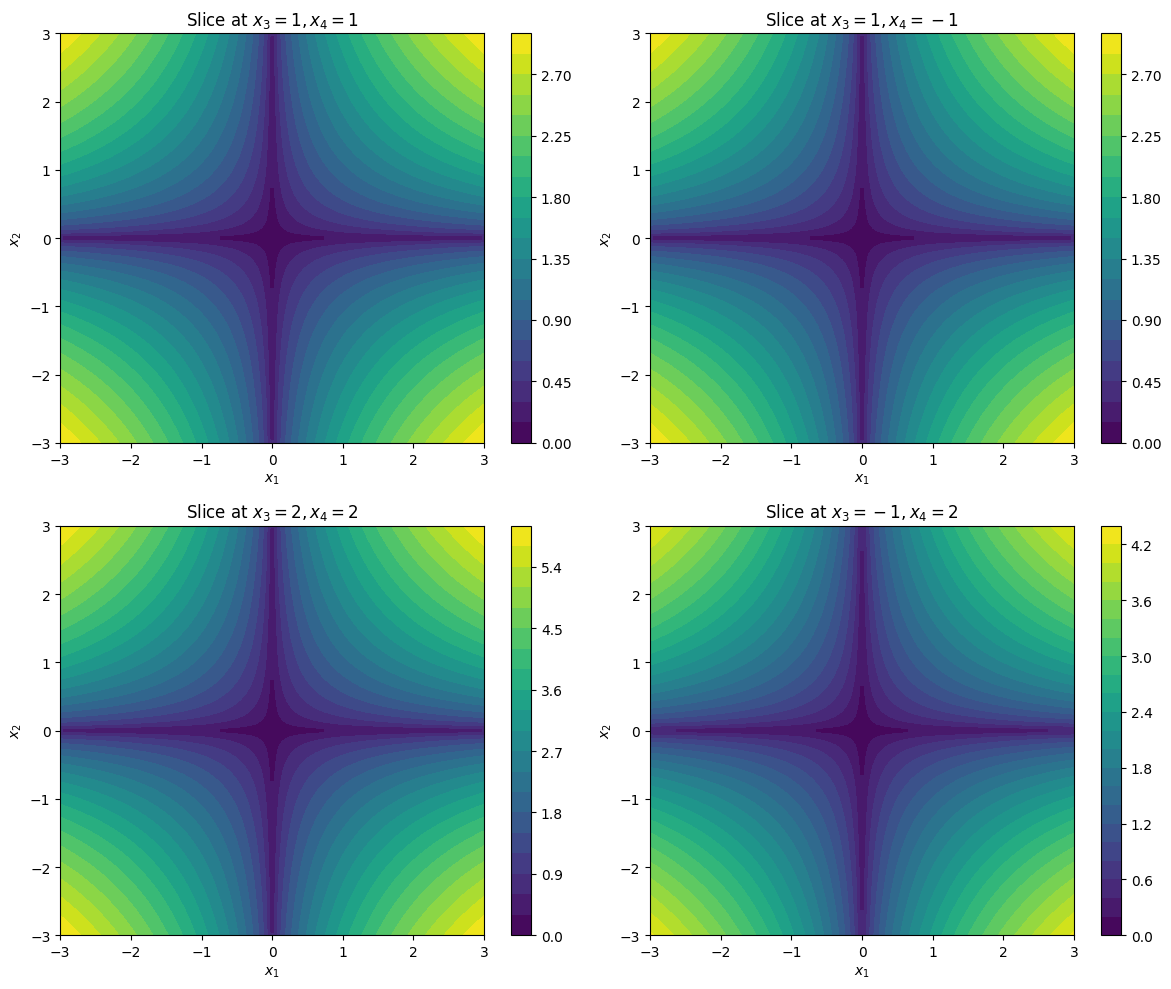

✗ Not directly visualizable: 4D input + 1D output requires 5 dimensions
  Alternative: Show 2D slices by fixing some variables (shown above)


In [3]:
# Show 2D slices by fixing x3 and x4
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fixed_values = [(1, 1), (1, -1), (2, 2), (-1, 2)]

for idx, (x3_fixed, x4_fixed) in enumerate(fixed_values):
    ax = axes[idx // 2, idx % 2]
    Z = np.sqrt(np.abs(X1 * X2 * x3_fixed * x4_fixed))
    
    contour = ax.contourf(X1, X2, Z, levels=20, cmap=cm.viridis)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'Slice at $x_3={x3_fixed}, x_4={x4_fixed}$')
    plt.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()

print("✗ Not directly visualizable: 4D input + 1D output requires 5 dimensions")
print("  Alternative: Show 2D slices by fixing some variables (shown above)")

## 3. Complex-Valued Scalar Function of Two Variables

$$f: \mathbb{R}^2 \to \mathbb{C}, \quad f(x_1, x_2) = \sqrt{|x_1 x_2|} + i\cos(x_1 + x_2)$$

**Visualization:** Partially visualizable. We can plot the real and imaginary parts separately, or use color to encode phase and brightness for magnitude.

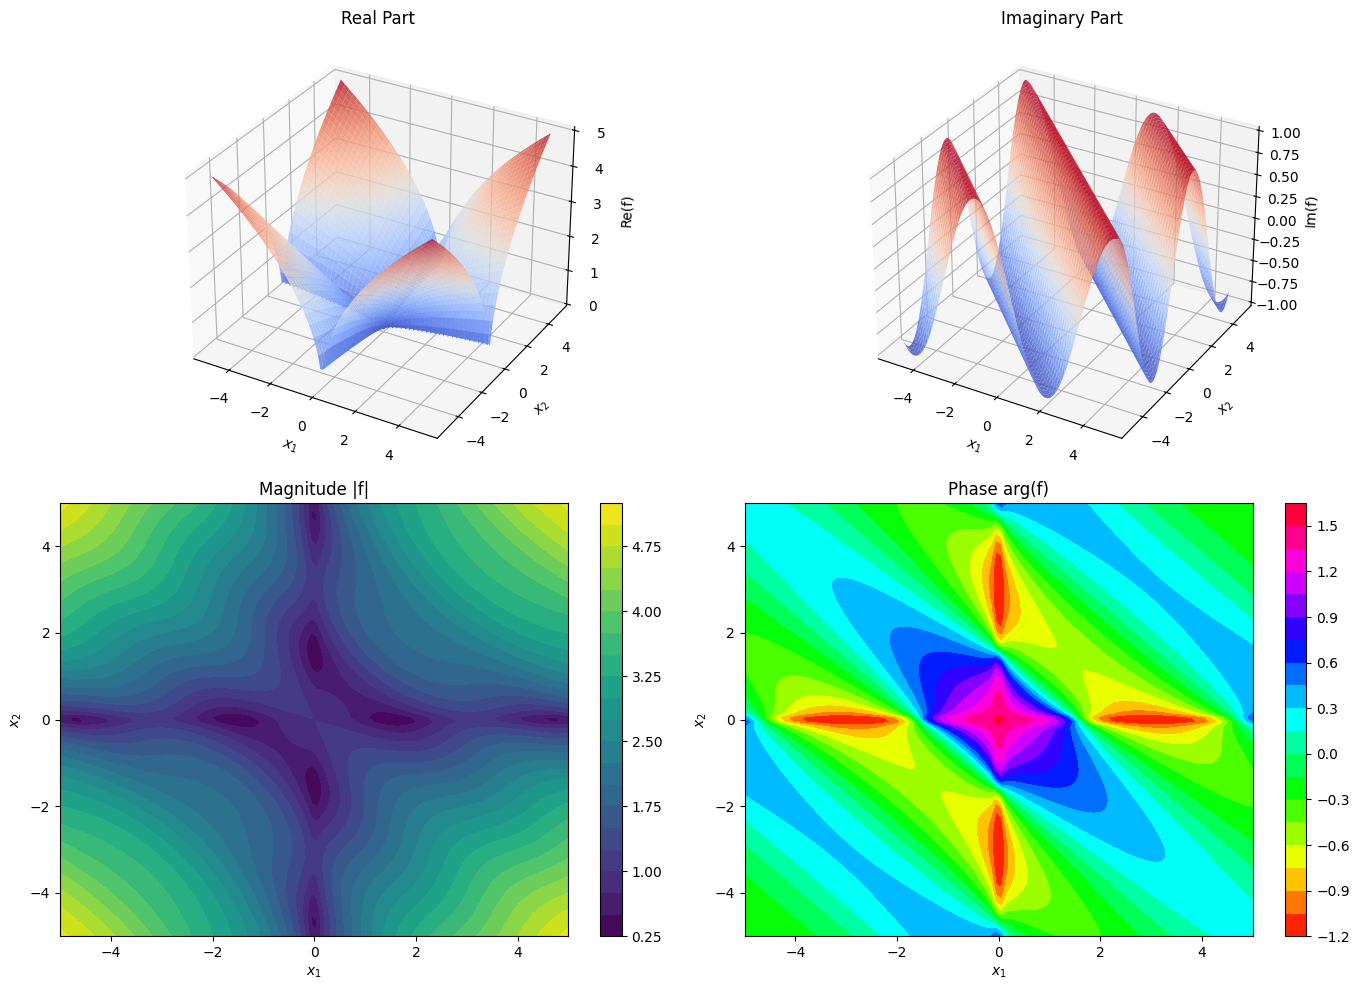

✓ Visualizable with multiple plots: Show real/imaginary parts or magnitude/phase separately


In [4]:
# Create grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate function values
Z_complex = np.sqrt(np.abs(X1 * X2)) + 1j * np.cos(X1 + X2)
Z_real = np.real(Z_complex)
Z_imag = np.imag(Z_complex)
Z_magnitude = np.abs(Z_complex)
Z_phase = np.angle(Z_complex)

# Create visualization
fig = plt.figure(figsize=(14, 10))

# Real part
ax1 = fig.add_subplot(221, projection='3d')
surf1 = ax1.plot_surface(X1, X2, Z_real, cmap=cm.coolwarm, alpha=0.8)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('Re(f)')
ax1.set_title('Real Part')

# Imaginary part
ax2 = fig.add_subplot(222, projection='3d')
surf2 = ax2.plot_surface(X1, X2, Z_imag, cmap=cm.coolwarm, alpha=0.8)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('Im(f)')
ax2.set_title('Imaginary Part')

# Magnitude
ax3 = fig.add_subplot(223)
contour3 = ax3.contourf(X1, X2, Z_magnitude, levels=20, cmap=cm.viridis)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title('Magnitude |f|')
plt.colorbar(contour3, ax=ax3)

# Phase
ax4 = fig.add_subplot(224)
contour4 = ax4.contourf(X1, X2, Z_phase, levels=20, cmap=cm.hsv)
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_title('Phase arg(f)')
plt.colorbar(contour4, ax=ax4)

plt.tight_layout()
plt.show()

print("✓ Visualizable with multiple plots: Show real/imaginary parts or magnitude/phase separately")

## 4. Vector Field in 2D

$$f: \mathbb{R}^2 \to \mathbb{R}^2, \quad f(x_1, x_2) = \left(-\frac{x_2}{3}, \frac{x_1}{3}\right)$$

**Visualization:** Yes, using arrow plots (quiver plots) to show vector direction and magnitude at each point.

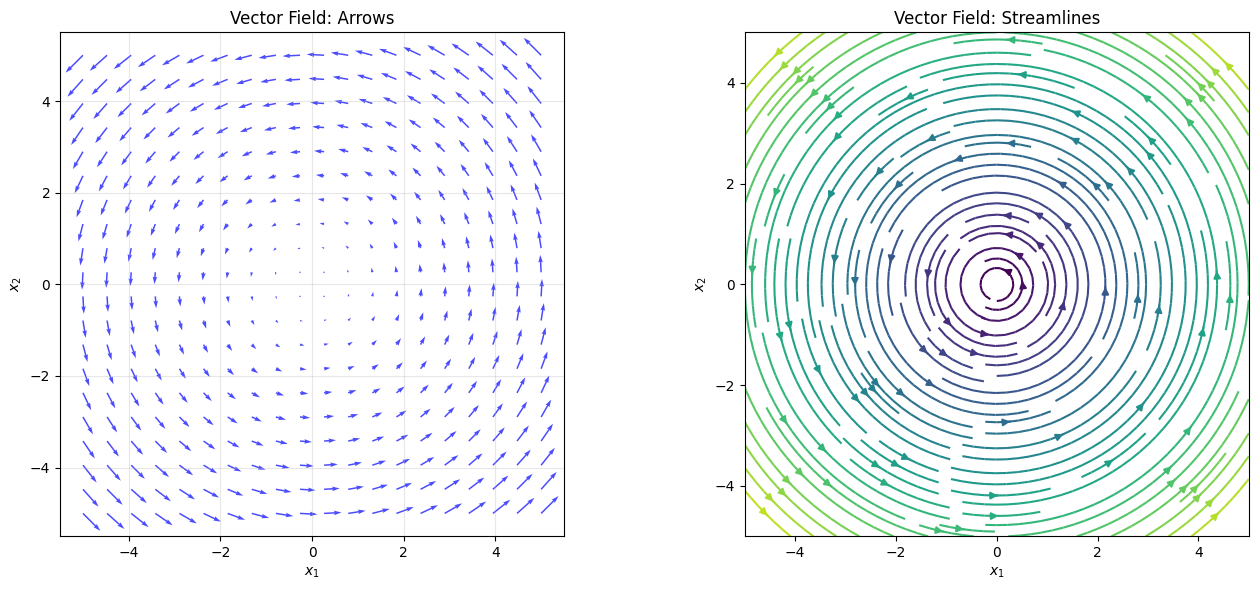

✓ Visualizable: 2D vector field shown with arrows or streamlines
  Note: This represents a rotation field (perpendicular to position vector)


In [5]:
# Create grid (fewer points for clearer arrows)
x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)
X1, X2 = np.meshgrid(x1, x2)

# Calculate vector field
U = -X2 / 3
V = X1 / 3

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Quiver plot
ax1.quiver(X1, X2, U, V, color='blue', alpha=0.7)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Vector Field: Arrows')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Streamplot
speed = np.sqrt(U**2 + V**2)
ax2.streamplot(X1, X2, U, V, color=speed, cmap=cm.viridis, density=1.5, linewidth=1.5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Vector Field: Streamlines')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("✓ Visualizable: 2D vector field shown with arrows or streamlines")
print("  Note: This represents a rotation field (perpendicular to position vector)")

## 5. Vector Field in 3D

$$f: \mathbb{R}^3 \to \mathbb{R}^3, \quad f(x, y, z) = (x^3 + yz^2, y^3 - xz^2, z^3)$$

**Visualization:** Yes, but challenging. We can use 3D quiver plots, though they can become cluttered. Showing streamlines or selecting specific planes can help.

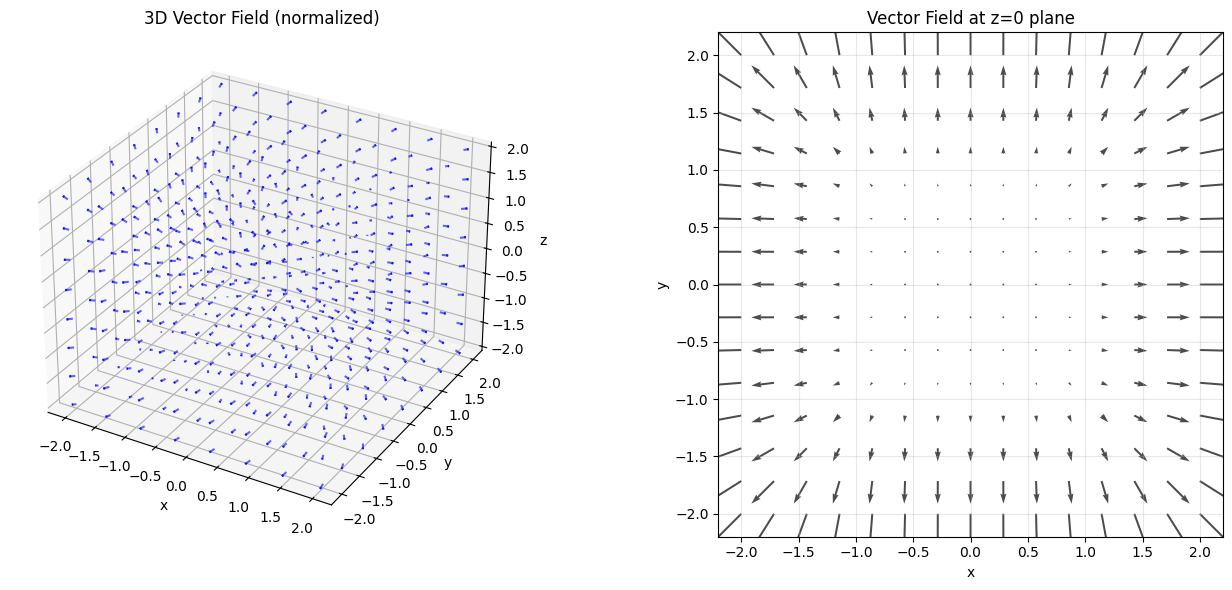

✓ Visualizable but challenging: 3D vector fields shown with 3D arrows or 2D slices
  Note: Arrows are normalized/scaled for better visualization


In [6]:
# Create a coarser grid for 3D (to avoid clutter)
x = np.linspace(-2, 2, 8)
y = np.linspace(-2, 2, 8)
z = np.linspace(-2, 2, 8)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate vector field
U = X**3 + Y * Z**2
V = Y**3 - X * Z**2
W = Z**3

# Create 3D quiver plot
fig = plt.figure(figsize=(14, 6))

# Full 3D quiver
ax1 = fig.add_subplot(121, projection='3d')
# Normalize vectors for better visualization
magnitude = np.sqrt(U**2 + V**2 + W**2)
magnitude[magnitude == 0] = 1  # Avoid division by zero
scale = 0.3
ax1.quiver(X, Y, Z, U/magnitude*scale, V/magnitude*scale, W/magnitude*scale, 
           length=0.3, normalize=False, alpha=0.6, color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('3D Vector Field (normalized)')

# Slice at z=0 plane
ax2 = fig.add_subplot(122)
x_slice = np.linspace(-2, 2, 15)
y_slice = np.linspace(-2, 2, 15)
X_slice, Y_slice = np.meshgrid(x_slice, y_slice)
Z_slice = np.zeros_like(X_slice)

U_slice = X_slice**3 + Y_slice * Z_slice**2
V_slice = Y_slice**3 - X_slice * Z_slice**2

ax2.quiver(X_slice, Y_slice, U_slice, V_slice, alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Vector Field at z=0 plane')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizable but challenging: 3D vector fields shown with 3D arrows or 2D slices")
print("  Note: Arrows are normalized/scaled for better visualization")

## 6. Parametric Curve in 3D

$$r: [0, 10] \to \mathbb{R}^3, \quad r(t) = (\cos(t), \sin(t), t)$$

**Visualization:** Yes, this is a helix and can be easily plotted as a 3D parametric curve.

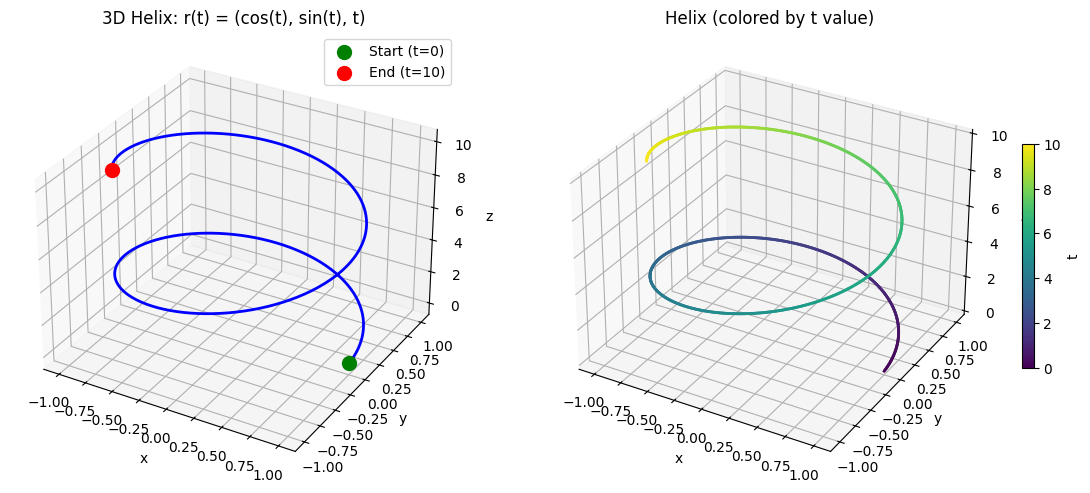

✓ Visualizable: Parametric curves in 3D are easily plotted
  This is a helix spiraling upward with constant radius


In [7]:
# Create parameter values
t = np.linspace(0, 10, 500)

# Calculate curve
x = np.cos(t)
y = np.sin(t)
z = t

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# 3D parametric curve
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x, y, z, linewidth=2, color='blue')
ax1.scatter([x[0]], [y[0]], [z[0]], color='green', s=100, label='Start (t=0)')
ax1.scatter([x[-1]], [y[-1]], [z[-1]], color='red', s=100, label='End (t=10)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('3D Helix: r(t) = (cos(t), sin(t), t)')
ax1.legend()

# Color-coded by parameter value
ax2 = fig.add_subplot(122, projection='3d')
# Create segments for color mapping
for i in range(len(t)-1):
    ax2.plot(x[i:i+2], y[i:i+2], z[i:i+2], 
             color=plt.cm.viridis(t[i]/10), linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (colored by t value)')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=plt.Normalize(vmin=0, vmax=10))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, shrink=0.5)
cbar.set_label('t')

plt.tight_layout()
plt.show()

print("✓ Visualizable: Parametric curves in 3D are easily plotted")
print("  This is a helix spiraling upward with constant radius")

## Summary

| Function Type | Visualizable? | Method |
|---------------|---------------|--------|
| $f: \mathbb{R}^2 \to \mathbb{R}$ | ✓ Yes | 3D surface or contour plot |
| $f: \mathbb{R}^4 \to \mathbb{R}$ | ✗ Not directly | Can show 2D slices |
| $f: \mathbb{R}^2 \to \mathbb{C}$ | ✓ Partially | Separate plots for Re/Im or magnitude/phase |
| $f: \mathbb{R}^2 \to \mathbb{R}^2$ | ✓ Yes | Quiver plot or streamlines |
| $f: \mathbb{R}^3 \to \mathbb{R}^3$ | ✓ Yes (challenging) | 3D quiver or 2D slices |
| $r: [0,10] \to \mathbb{R}^3$ | ✓ Yes | 3D parametric curve |